In [4]:
import keras
from keras import regularizers
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import librosa
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import seaborn as sns
import glob 
import os
import pickle
import IPython.display as ipd 

Using TensorFlow backend.


In [3]:
ref = pd.read_csv('out.csv')

In [4]:
ref.labels.value_counts()

female_sad         1096
female_disgust     1096
female_fear        1096
female_happy       1096
female_angry       1096
female_neutral     1056
male_neutral        839
male_happy          827
male_disgust        827
male_sad            827
male_angry          827
male_fear           827
female_surprise     496
male_surprise       156
Name: labels, dtype: int64

In [5]:
ref

Unnamed: 0          labels source  \
0               0      male_angry  SAVEE   
1               1      male_angry  SAVEE   
2               2      male_angry  SAVEE   
3               3      male_angry  SAVEE   
4               4      male_angry  SAVEE   
5               5      male_angry  SAVEE   
6               6      male_angry  SAVEE   
7               7      male_angry  SAVEE   
8               8      male_angry  SAVEE   
9               9      male_angry  SAVEE   
10             10      male_angry  SAVEE   
11             11      male_angry  SAVEE   
12             12      male_angry  SAVEE   
13             13      male_angry  SAVEE   
14             14      male_angry  SAVEE   
15             15    male_disgust  SAVEE   
16             16    male_disgust  SAVEE   
17             17    male_disgust  SAVEE   
18             18    male_disgust  SAVEE   
19             19    male_disgust  SAVEE   
20             20    male_disgust  SAVEE   
21             21    male_disgust  SAVEE   
22             22    male_disgust  SAVEE   
23             23    male_disgust  SAVEE   
24             24    male_disgust  SAVEE   
25             25    male_disgust  SAVEE   
26             26    male_disgust  SAVEE   
27             27    male_disgust  SAVEE   
28             28    male_disgust  SAVEE   
29             29    male_disgust  SAVEE   
...           ...             ...    ...   
12132        7412    female_angry  CREMA   
12133        7413  female_disgust  CREMA   
12134        7414     female_fear  CREMA   
12135        7415    female_happy  CREMA   
12136        7416  female_neutral  CREMA   
12137        7417      female_sad  CREMA   
12138        7418    female_angry  CREMA   
12139        7419  female_disgust  CREMA   
12140        7420     female_fear  CREMA   
12141        7421    female_happy  CREMA   
12142        7422  female_neutral  CREMA   
12143        7423      female_sad  CREMA   
12144        7424    female_angry  CREMA   
12145        7425  female_disgust  CREMA   
12146        7426     female_fear  CREMA   
12147        7427    female_happy  CREMA   
12148        7428  female_neutral  CREMA   
12149        7429      female_sad  CREMA   
12150        7430    female_angry  CREMA   
12151        7431  female_disgust  CREMA   
12152        7432     female_fear  CREMA   
12153        7433    female_happy  CREMA   
12154        7434  female_neutral  CREMA   
12155        7435      female_sad  CREMA   
12156        7436    female_angry  CREMA   
12157        7437  female_disgust  CREMA   
12158        7438     female_fear  CREMA   
12159        7439    female_happy  CREMA   
12160        7440  female_neutral  CREMA   
12161        7441      female_sad  CREMA   

                                                    path  
0      C:/Users/Mi Notebook/Desktop/PavlodarCapture/s...  
1      C:/Users/Mi Notebook/Desktop/PavlodarCapture/s...  
2      C:/Users/Mi Notebook/Desktop/PavlodarCapture/s...  
3      C:/Users/Mi Notebook/Desktop/PavlodarCapture/s...  
4      C:/Users/Mi Notebook/Desktop/PavlodarCapture/s...  
5      C:/Users/Mi Notebook/Desktop/PavlodarCapture/s...  
6      C:/Users/Mi Notebook/Desktop/PavlodarCapture/s...  
7      C:/Users/Mi Notebook/Desktop/PavlodarCapture/s...  
8      C:/Users/Mi Notebook/Desktop/PavlodarCapture/s...  
9      C:/Users/Mi Notebook/Desktop/PavlodarCapture/s...  
10     C:/Users/Mi Notebook/Desktop/PavlodarCapture/s...  
11     C:/Users/Mi Notebook/Desktop/PavlodarCapture/s...  
12     C:/Users/Mi Notebook/Desktop/PavlodarCapture/s...  
13     C:/Users/Mi Notebook/Desktop/PavlodarCapture/s...  
14     C:/Users/Mi Notebook/Desktop/PavlodarCapture/s...  
15     C:/Users/Mi Notebook/Desktop/PavlodarCapture/s...  
16     C:/Users/Mi Notebook/Desktop/PavlodarCapture/s...  
17     C:/Users/Mi Notebook/Desktop/PavlodarCapture/s...  
18     C:/Users/Mi Notebook/Desktop/PavlodarCapture/s...  
19     C:/Users/Mi Notebook/Desktop/PavlodarCapture/s...  
20     C:/Users/Mi Notebook/Desktop/Pav

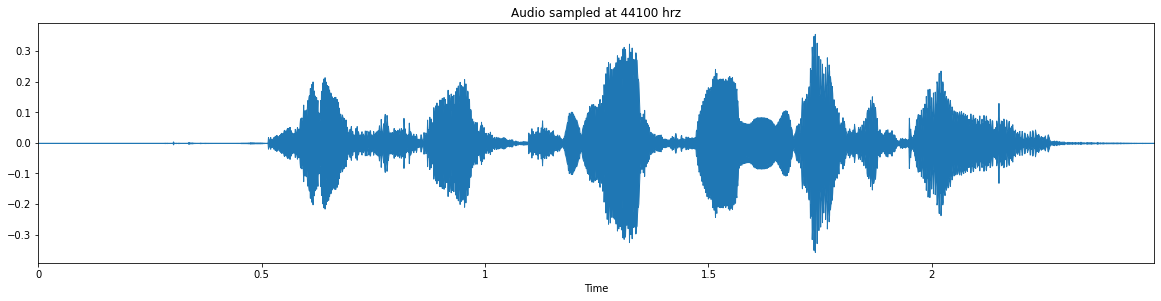

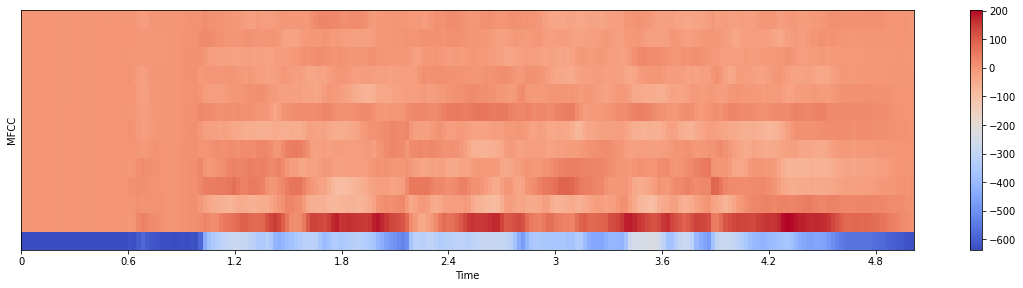

In [6]:
# MFCC feature

# Gender - Female, Emotion - Angry

path = ref['path'][932]

X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# Audio wave

plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveplot(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC

plt.figure(figsize=(20, 15))
plt.subplot(3,1,2)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

# Audio play
ipd.Audio(path)

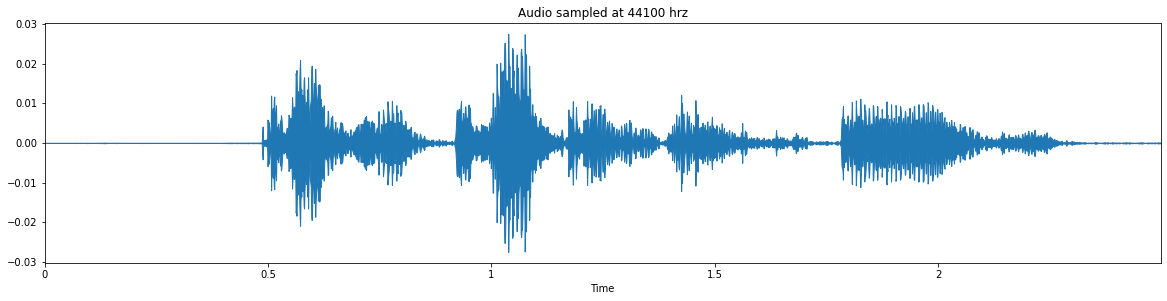

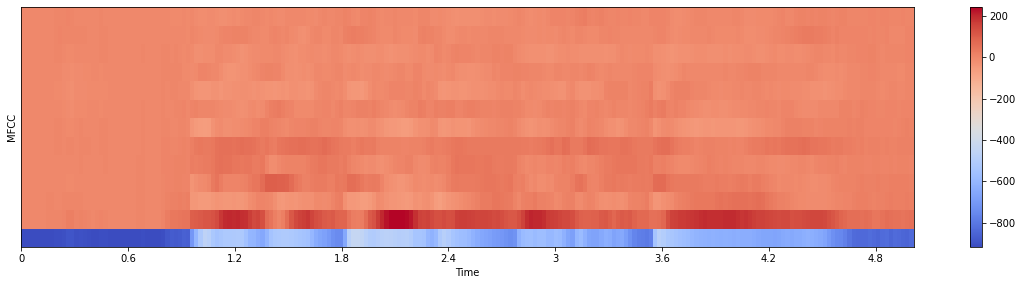

In [7]:
# MFCC feature

# Gender - Male, Emotion - Angry

path = ref['path'][988]

X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# Audio wave

plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveplot(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC

plt.figure(figsize=(20, 15))
plt.subplot(3,1,2)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

# Audio play
ipd.Audio(path)

216
216


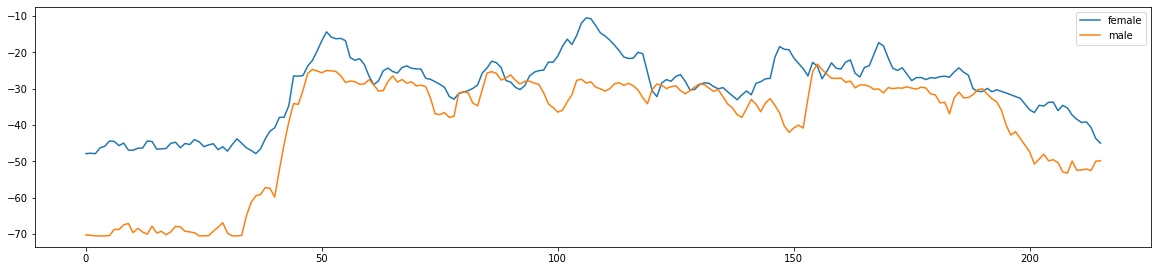

In [8]:
# Gender - Female, Emotion - Angry

path = ref['path'][932]
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
female = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
female = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(female))

# Gender - Male, Emotion - Angry

path = ref['path'][988]
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
male = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
male = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(male))

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
plt.plot(female, label='female')
plt.plot(male, label='male')
plt.legend()

In [9]:
#Add feature from MFCC

df = pd.DataFrame(columns=['feature'])

counter=0
for index,path in enumerate(ref.path):
    X, sample_rate = librosa.load(path, res_type='kaiser_fast', duration=2.5, sr=44100, offset=0.5)
    sample_rate = np.array(sample_rate)
    
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
    df.loc[counter] = [mfccs]
    counter = counter + 1   

print(len(df))
df.head()

12162


feature
0  [-11.113932, -7.215754, -6.21919, -5.9265437, ...
1  [-24.449831, -22.465742, -22.928043, -23.24380...
2  [-25.000114, -24.520254, -24.178185, -23.84745...
3  [-1.529839, -4.3334365, -12.285237, -13.083024...
4  [-22.458635, -22.467834, -25.88436, -27.827044...

In [10]:
df = pd.concat([ref,pd.DataFrame(df['feature'].values.tolist())],axis=1)
df

Unnamed: 0          labels source  \
0               0      male_angry  SAVEE   
1               1      male_angry  SAVEE   
2               2      male_angry  SAVEE   
3               3      male_angry  SAVEE   
4               4      male_angry  SAVEE   
5               5      male_angry  SAVEE   
6               6      male_angry  SAVEE   
7               7      male_angry  SAVEE   
8               8      male_angry  SAVEE   
9               9      male_angry  SAVEE   
10             10      male_angry  SAVEE   
11             11      male_angry  SAVEE   
12             12      male_angry  SAVEE   
13             13      male_angry  SAVEE   
14             14      male_angry  SAVEE   
15             15    male_disgust  SAVEE   
16             16    male_disgust  SAVEE   
17             17    male_disgust  SAVEE   
18             18    male_disgust  SAVEE   
19             19    male_disgust  SAVEE   
20             20    male_disgust  SAVEE   
21             21    male_disgust  SAVEE   
22             22    male_disgust  SAVEE   
23             23    male_disgust  SAVEE   
24             24    male_disgust  SAVEE   
25             25    male_disgust  SAVEE   
26             26    male_disgust  SAVEE   
27             27    male_disgust  SAVEE   
28             28    male_disgust  SAVEE   
29             29    male_disgust  SAVEE   
...           ...             ...    ...   
12132        7412    female_angry  CREMA   
12133        7413  female_disgust  CREMA   
12134        7414     female_fear  CREMA   
12135        7415    female_happy  CREMA   
12136        7416  female_neutral  CREMA   
12137        7417      female_sad  CREMA   
12138        7418    female_angry  CREMA   
12139        7419  female_disgust  CREMA   
12140        7420     female_fear  CREMA   
12141        7421    female_happy  CREMA   
12142        7422  female_neutral  CREMA   
12143        7423      female_sad  CREMA   
12144        7424    female_angry  CREMA   
12145        7425  female_disgust  CREMA   
12146        7426     female_fear  CREMA   
12147        7427    female_happy  CREMA   
12148        7428  female_neutral  CREMA   
12149        7429      female_sad  CREMA   
12150        7430    female_angry  CREMA   
12151        7431  female_disgust  CREMA   
12152        7432     female_fear  CREMA   
12153        7433    female_happy  CREMA   
12154        7434  female_neutral  CREMA   
12155        7435      female_sad  CREMA   
12156        7436    female_angry  CREMA   
12157        7437  female_disgust  CREMA   
12158        7438     female_fear  CREMA   
12159        7439    female_happy  CREMA   
12160        7440  female_neutral  CREMA   
12161        7441      female_sad  CREMA   

                                                    path          0  \
0      C:/Users/Mi Notebook/Desktop/PavlodarCapture/s... -11.113932   
1      C:/Users/Mi Notebook/Desktop/PavlodarCapture/s... -24.449831   
2      C:/Users/Mi Notebook/Desktop/PavlodarCapture/s... -25.000114   
3      C:/Users/Mi Notebook/Desktop/PavlodarCapture/s...  -1.529839   
4      C:/Users/Mi Notebook/Desktop/PavlodarCapture/s... -22.458635   
5      C:/Users/Mi Notebook/Desktop/PavlodarCapture/s... -22.050648   
6      C:/Users/Mi Notebook/Desktop/PavlodarCapture/s... -25.975300   
7      C:/Users/Mi Notebook/Desktop/PavlodarCapture/s... -27.551817   
8      C:/Users/Mi Notebook/Desktop/PavlodarCapture/s... -27.401009   
9      C:/Users/Mi Notebook/Desktop/PavlodarCapture/s... -10.492441   
10     C:/Users/Mi Notebook/Desktop/PavlodarCapture/s...  -3.311602   
11     C:/Users/Mi Notebook/Desktop/PavlodarCapture/s... -24.472332   
12     C:/Users/Mi Notebook/Desktop/PavlodarCapture/s... -23.959705   
13     C:/Users/Mi Notebook/Desktop/PavlodarCapture/s...  -4.868550   
14     C:/Users/Mi Notebook/Desktop/PavlodarCapture/s...  -4.370175   
15     C:/Users/Mi Notebook/Desktop/PavlodarCapture/s... -21.589529   
16     C:/Users/Mi Notebook/Desktop/PavlodarCapture/s... -25.927307   


In [11]:
df=df.fillna(0)
df = df.drop(columns=['Unnamed: 0'], axis=1)
print(df.shape)
df

(12162, 219)


labels source  \
0          male_angry  SAVEE   
1          male_angry  SAVEE   
2          male_angry  SAVEE   
3          male_angry  SAVEE   
4          male_angry  SAVEE   
5          male_angry  SAVEE   
6          male_angry  SAVEE   
7          male_angry  SAVEE   
8          male_angry  SAVEE   
9          male_angry  SAVEE   
10         male_angry  SAVEE   
11         male_angry  SAVEE   
12         male_angry  SAVEE   
13         male_angry  SAVEE   
14         male_angry  SAVEE   
15       male_disgust  SAVEE   
16       male_disgust  SAVEE   
17       male_disgust  SAVEE   
18       male_disgust  SAVEE   
19       male_disgust  SAVEE   
20       male_disgust  SAVEE   
21       male_disgust  SAVEE   
22       male_disgust  SAVEE   
23       male_disgust  SAVEE   
24       male_disgust  SAVEE   
25       male_disgust  SAVEE   
26       male_disgust  SAVEE   
27       male_disgust  SAVEE   
28       male_disgust  SAVEE   
29       male_disgust  SAVEE   
...               ...    ...   
12132    female_angry  CREMA   
12133  female_disgust  CREMA   
12134     female_fear  CREMA   
12135    female_happy  CREMA   
12136  female_neutral  CREMA   
12137      female_sad  CREMA   
12138    female_angry  CREMA   
12139  female_disgust  CREMA   
12140     female_fear  CREMA   
12141    female_happy  CREMA   
12142  female_neutral  CREMA   
12143      female_sad  CREMA   
12144    female_angry  CREMA   
12145  female_disgust  CREMA   
12146     female_fear  CREMA   
12147    female_happy  CREMA   
12148  female_neutral  CREMA   
12149      female_sad  CREMA   
12150    female_angry  CREMA   
12151  female_disgust  CREMA   
12152     female_fear  CREMA   
12153    female_happy  CREMA   
12154  female_neutral  CREMA   
12155      female_sad  CREMA   
12156    female_angry  CREMA   
12157  female_disgust  CREMA   
12158     female_fear  CREMA   
12159    female_happy  CREMA   
12160  female_neutral  CREMA   
12161      female_sad  CREMA   

                                                    path          0  \
0      C:/Users/Mi Notebook/Desktop/PavlodarCapture/s... -11.113932   
1      C:/Users/Mi Notebook/Desktop/PavlodarCapture/s... -24.449831   
2      C:/Users/Mi Notebook/Desktop/PavlodarCapture/s... -25.000114   
3      C:/Users/Mi Notebook/Desktop/PavlodarCapture/s...  -1.529839   
4      C:/Users/Mi Notebook/Desktop/PavlodarCapture/s... -22.458635   
5      C:/Users/Mi Notebook/Desktop/PavlodarCapture/s... -22.050648   
6      C:/Users/Mi Notebook/Desktop/PavlodarCapture/s... -25.975300   
7      C:/Users/Mi Notebook/Desktop/PavlodarCapture/s... -27.551817   
8      C:/Users/Mi Notebook/Desktop/PavlodarCapture/s... -27.401009   
9      C:/Users/Mi Notebook/Desktop/PavlodarCapture/s... -10.492441   
10     C:/Users/Mi Notebook/Desktop/PavlodarCapture/s...  -3.311602   
11     C:/Users/Mi Notebook/Desktop/PavlodarCapture/s... -24.472332   
12     C:/Users/Mi Notebook/Desktop/PavlodarCapture/s... -23.959705   
13     C:/Users/Mi Notebook/Desktop/PavlodarCapture/s...  -4.868550   
14     C:/Users/Mi Notebook/Desktop/PavlodarCapture/s...  -4.370175   
15     C:/Users/Mi Notebook/Desktop/PavlodarCapture/s... -21.589529   
16     C:/Users/Mi Notebook/Desktop/PavlodarCapture/s... -25.927307   
17     C:/Users/Mi Notebook/Desktop/PavlodarCapture/s...  -4.164297   
18     C:/Users/Mi Notebook/Desktop/PavlodarCapture/s... -24.981075   
19     C:/Users/Mi Notebook/Desktop/PavlodarCapture/s... -26.207531   
20     C:/Users/Mi Notebook/Desktop/PavlodarCapture/s... -17.685799   
21     C:/Users/Mi Notebook/Desktop/PavlodarCapture/s... -24.689486   
22     C:/Users/Mi Notebook/Desktop/PavlodarCapture/s... -25.301998   
23     C:/Users/Mi Notebook/Desktop/PavlodarCapture/s... -27.752260   
24     C:/Users/Mi Notebook/Desktop/PavlodarCapture/s...  -9.435915   
25     C:/Users/Mi Notebook/Desktop/PavlodarCapture/s... -26.713663   
26     C:/Users/Mi Notebook/Desktop/PavlodarCapture/s... -27.650753   
27     C:/Users/Mi Notebook/Desktop/Pavlod

In [12]:
df.to_csv('data.csv')

In [13]:
df = pd.read_csv('data.csv')
df

Unnamed: 0          labels source  \
0               0      male_angry  SAVEE   
1               1      male_angry  SAVEE   
2               2      male_angry  SAVEE   
3               3      male_angry  SAVEE   
4               4      male_angry  SAVEE   
5               5      male_angry  SAVEE   
6               6      male_angry  SAVEE   
7               7      male_angry  SAVEE   
8               8      male_angry  SAVEE   
9               9      male_angry  SAVEE   
10             10      male_angry  SAVEE   
11             11      male_angry  SAVEE   
12             12      male_angry  SAVEE   
13             13      male_angry  SAVEE   
14             14      male_angry  SAVEE   
15             15    male_disgust  SAVEE   
16             16    male_disgust  SAVEE   
17             17    male_disgust  SAVEE   
18             18    male_disgust  SAVEE   
19             19    male_disgust  SAVEE   
20             20    male_disgust  SAVEE   
21             21    male_disgust  SAVEE   
22             22    male_disgust  SAVEE   
23             23    male_disgust  SAVEE   
24             24    male_disgust  SAVEE   
25             25    male_disgust  SAVEE   
26             26    male_disgust  SAVEE   
27             27    male_disgust  SAVEE   
28             28    male_disgust  SAVEE   
29             29    male_disgust  SAVEE   
...           ...             ...    ...   
12132       12132    female_angry  CREMA   
12133       12133  female_disgust  CREMA   
12134       12134     female_fear  CREMA   
12135       12135    female_happy  CREMA   
12136       12136  female_neutral  CREMA   
12137       12137      female_sad  CREMA   
12138       12138    female_angry  CREMA   
12139       12139  female_disgust  CREMA   
12140       12140     female_fear  CREMA   
12141       12141    female_happy  CREMA   
12142       12142  female_neutral  CREMA   
12143       12143      female_sad  CREMA   
12144       12144    female_angry  CREMA   
12145       12145  female_disgust  CREMA   
12146       12146     female_fear  CREMA   
12147       12147    female_happy  CREMA   
12148       12148  female_neutral  CREMA   
12149       12149      female_sad  CREMA   
12150       12150    female_angry  CREMA   
12151       12151  female_disgust  CREMA   
12152       12152     female_fear  CREMA   
12153       12153    female_happy  CREMA   
12154       12154  female_neutral  CREMA   
12155       12155      female_sad  CREMA   
12156       12156    female_angry  CREMA   
12157       12157  female_disgust  CREMA   
12158       12158     female_fear  CREMA   
12159       12159    female_happy  CREMA   
12160       12160  female_neutral  CREMA   
12161       12161      female_sad  CREMA   

                                                    path          0  \
0      C:/Users/Mi Notebook/Desktop/PavlodarCapture/s... -11.113932   
1      C:/Users/Mi Notebook/Desktop/PavlodarCapture/s... -24.449831   
2      C:/Users/Mi Notebook/Desktop/PavlodarCapture/s... -25.000114   
3      C:/Users/Mi Notebook/Desktop/PavlodarCapture/s...  -1.529839   
4      C:/Users/Mi Notebook/Desktop/PavlodarCapture/s... -22.458635   
5      C:/Users/Mi Notebook/Desktop/PavlodarCapture/s... -22.050648   
6      C:/Users/Mi Notebook/Desktop/PavlodarCapture/s... -25.975300   
7      C:/Users/Mi Notebook/Desktop/PavlodarCapture/s... -27.551817   
8      C:/Users/Mi Notebook/Desktop/PavlodarCapture/s... -27.401009   
9      C:/Users/Mi Notebook/Desktop/PavlodarCapture/s... -10.492441   
10     C:/Users/Mi Notebook/Desktop/PavlodarCapture/s...  -3.311602   
11     C:/Users/Mi Notebook/Desktop/PavlodarCapture/s... -24.472332   
12     C:/Users/Mi Notebook/Desktop/PavlodarCapture/s... -23.959705   
13     C:/Users/Mi Notebook/Desktop/PavlodarCapture/s...  -4.868550   
14     C:/Users/Mi Notebook/Desktop/PavlodarCapture/s...  -4.370175   
15     C:/Users/Mi Notebook/Desktop/PavlodarCapture/s... -21.589529   
16     C:/Users/Mi Notebook/Desktop/PavlodarCapture/s... -25.927307   


In [14]:
df = df.drop(columns=['Unnamed: 0'], axis=1)

In [15]:
df

labels source  \
0          male_angry  SAVEE   
1          male_angry  SAVEE   
2          male_angry  SAVEE   
3          male_angry  SAVEE   
4          male_angry  SAVEE   
5          male_angry  SAVEE   
6          male_angry  SAVEE   
7          male_angry  SAVEE   
8          male_angry  SAVEE   
9          male_angry  SAVEE   
10         male_angry  SAVEE   
11         male_angry  SAVEE   
12         male_angry  SAVEE   
13         male_angry  SAVEE   
14         male_angry  SAVEE   
15       male_disgust  SAVEE   
16       male_disgust  SAVEE   
17       male_disgust  SAVEE   
18       male_disgust  SAVEE   
19       male_disgust  SAVEE   
20       male_disgust  SAVEE   
21       male_disgust  SAVEE   
22       male_disgust  SAVEE   
23       male_disgust  SAVEE   
24       male_disgust  SAVEE   
25       male_disgust  SAVEE   
26       male_disgust  SAVEE   
27       male_disgust  SAVEE   
28       male_disgust  SAVEE   
29       male_disgust  SAVEE   
...               ...    ...   
12132    female_angry  CREMA   
12133  female_disgust  CREMA   
12134     female_fear  CREMA   
12135    female_happy  CREMA   
12136  female_neutral  CREMA   
12137      female_sad  CREMA   
12138    female_angry  CREMA   
12139  female_disgust  CREMA   
12140     female_fear  CREMA   
12141    female_happy  CREMA   
12142  female_neutral  CREMA   
12143      female_sad  CREMA   
12144    female_angry  CREMA   
12145  female_disgust  CREMA   
12146     female_fear  CREMA   
12147    female_happy  CREMA   
12148  female_neutral  CREMA   
12149      female_sad  CREMA   
12150    female_angry  CREMA   
12151  female_disgust  CREMA   
12152     female_fear  CREMA   
12153    female_happy  CREMA   
12154  female_neutral  CREMA   
12155      female_sad  CREMA   
12156    female_angry  CREMA   
12157  female_disgust  CREMA   
12158     female_fear  CREMA   
12159    female_happy  CREMA   
12160  female_neutral  CREMA   
12161      female_sad  CREMA   

                                                    path          0  \
0      C:/Users/Mi Notebook/Desktop/PavlodarCapture/s... -11.113932   
1      C:/Users/Mi Notebook/Desktop/PavlodarCapture/s... -24.449831   
2      C:/Users/Mi Notebook/Desktop/PavlodarCapture/s... -25.000114   
3      C:/Users/Mi Notebook/Desktop/PavlodarCapture/s...  -1.529839   
4      C:/Users/Mi Notebook/Desktop/PavlodarCapture/s... -22.458635   
5      C:/Users/Mi Notebook/Desktop/PavlodarCapture/s... -22.050648   
6      C:/Users/Mi Notebook/Desktop/PavlodarCapture/s... -25.975300   
7      C:/Users/Mi Notebook/Desktop/PavlodarCapture/s... -27.551817   
8      C:/Users/Mi Notebook/Desktop/PavlodarCapture/s... -27.401009   
9      C:/Users/Mi Notebook/Desktop/PavlodarCapture/s... -10.492441   
10     C:/Users/Mi Notebook/Desktop/PavlodarCapture/s...  -3.311602   
11     C:/Users/Mi Notebook/Desktop/PavlodarCapture/s... -24.472332   
12     C:/Users/Mi Notebook/Desktop/PavlodarCapture/s... -23.959705   
13     C:/Users/Mi Notebook/Desktop/PavlodarCapture/s...  -4.868550   
14     C:/Users/Mi Notebook/Desktop/PavlodarCapture/s...  -4.370175   
15     C:/Users/Mi Notebook/Desktop/PavlodarCapture/s... -21.589529   
16     C:/Users/Mi Notebook/Desktop/PavlodarCapture/s... -25.927307   
17     C:/Users/Mi Notebook/Desktop/PavlodarCapture/s...  -4.164297   
18     C:/Users/Mi Notebook/Desktop/PavlodarCapture/s... -24.981075   
19     C:/Users/Mi Notebook/Desktop/PavlodarCapture/s... -26.207531   
20     C:/Users/Mi Notebook/Desktop/PavlodarCapture/s... -17.685799   
21     C:/Users/Mi Notebook/Desktop/PavlodarCapture/s... -24.689486   
22     C:/Users/Mi Notebook/Desktop/PavlodarCapture/s... -25.301998   
23     C:/Users/Mi Notebook/Desktop/PavlodarCapture/s... -27.752260   
24     C:/Users/Mi Notebook/Desktop/PavlodarCapture/s...  -9.435915   
25     C:/Users/Mi Notebook/Desktop/PavlodarCapture/s... -26.713663   
26     C:/Users/Mi Notebook/Desktop/PavlodarCapture/s... -27.650753   
27     C:/Users/Mi Notebook/Desktop/Pavlod

In [16]:
df=df.fillna(0)

In [17]:
# Make train and test sets

X_train, X_test, Y_train, Y_test = train_test_split(df.drop(['path','labels','source'],axis=1)
                                                    , df.labels
                                                    , test_size=0.08
                                                    , shuffle=True
                                                    , random_state=42)

In [18]:
# Train and tests size

print(f'X_train size = {X_train.shape}')
print(f'Y_train size = {Y_train.shape}')
print(f'X_test size = {X_test.shape}')
print(f'Y_test size = {Y_test.shape}')

X_train size = (11189, 216)
Y_train size = (11189,)
X_test size = (973, 216)
Y_test size = (973,)


In [19]:
max_data = np.max(X_train)
min_data = np.min(X_train)
X_train = (X_train-min_data)/(max_data-min_data+1e-6)
X_train =  X_train-0.5

max_data = np.max(X_test)
min_data = np.min(X_test)
X_test = (X_test-min_data)/(max_data-min_data+1e-6)
X_test =  X_test-0.5

In [20]:
# Lets few preparation steps to get it into the correct format for Keras 
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

# one hot encode the target 
lb = LabelEncoder()
Y_train = np_utils.to_categorical(lb.fit_transform(Y_train))
Y_test = np_utils.to_categorical(lb.fit_transform(Y_test))

print(X_train.shape)
print(lb.classes_)
#print(y_train[0:10])
#print(y_test[0:10])

# Pickel the lb object for future use 
filename = 'labels'
outfile = open(filename,'wb')
pickle.dump(lb,outfile)
outfile.close()

(11189, 216)
['female_angry' 'female_disgust' 'female_fear' 'female_happy'
 'female_neutral' 'female_sad' 'female_surprise' 'male_angry'
 'male_disgust' 'male_fear' 'male_happy' 'male_neutral' 'male_sad'
 'male_surprise']


In [21]:
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

In [22]:
print(X_train.shape)
print(X_test.shape)

(11189, 216, 1)
(973, 216, 1)


In [23]:
model_1 = Sequential()
model_1.add(Conv1D(256, 8, padding='same',input_shape=(X_train.shape[1],1))) 
model_1.add(Activation('relu'))
model_1.add(BatchNormalization())
model_1.add(Flatten())
model_1.add(Dense(14)) # Target class number
model_1.add(Activation('softmax'))
opt = keras.optimizers.RMSprop(learning_rate = 0.0001)
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 216, 256)          2304      
_________________________________________________________________
activation_1 (Activation)    (None, 216, 256)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 216, 256)          1024      
_________________________________________________________________
flatten_1 (Flatten)          (None, 55296)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 14)                774158    
_________________________________________________________________
activation_2 (Activation)    (None, 14)                0         
Total params: 777,486
Trainable params: 776,974
Non-trainable params: 512
______________________________________________

In [24]:
model_1.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
model_history_1 = model_1.fit(X_train, Y_train, batch_size=16, epochs=100, validation_data=(X_test, Y_test))


Train on 11189 samples, validate on 973 samples
Epoch 1/100
 5936/11189 [==============>...............] - ETA: 2:44 - loss: 2.4851 - accuracy: 0.18 - ETA: 1:08 - loss: 2.7819 - accuracy: 0.10 - ETA: 48s - loss: 2.8471 - accuracy: 0.1125 - ETA: 40s - loss: 2.7976 - accuracy: 0.098 - ETA: 35s - loss: 2.7320 - accuracy: 0.111 - ETA: 32s - loss: 2.7755 - accuracy: 0.130 - ETA: 30s - loss: 2.7827 - accuracy: 0.115 - ETA: 28s - loss: 2.7329 - accuracy: 0.125 - ETA: 27s - loss: 2.6975 - accuracy: 0.128 - ETA: 26s - loss: 2.6801 - accuracy: 0.131 - ETA: 26s - loss: 2.6785 - accuracy: 0.131 - ETA: 25s - loss: 2.6573 - accuracy: 0.135 - ETA: 25s - loss: 2.6415 - accuracy: 0.137 - ETA: 24s - loss: 2.6389 - accuracy: 0.131 - ETA: 24s - loss: 2.6433 - accuracy: 0.133 - ETA: 23s - loss: 2.6245 - accuracy: 0.139 - ETA: 23s - loss: 2.6187 - accuracy: 0.136 - ETA: 23s - loss: 2.6236 - accuracy: 0.137 - ETA: 22s - loss: 2.6061 - accuracy: 0.143 - ETA: 22s - loss: 2.5998 - accuracy: 0.145 - ETA: 22s - 

In [ ]:
# Save model and weights
model_name = 'Conv1D_RMSprop.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model_1.save(model_path)
print('Save model and weights at %s ' % model_path)

# Save the model to disk
model_json = model.to_json()
with open("model_json.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

In [25]:
model_2 = Sequential()
model_2.add(Conv1D(256, 8, padding='same',input_shape=(X_train.shape[1],1))) 
model_2.add(Activation('relu'))
model_2.add(BatchNormalization())
model_2.add(Flatten())
model_2.add(Dense(14))
model_2.add(Activation('softmax'))
opt = keras.optimizers.Adam(learning_rate = 0.0001)
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 216, 256)          2304      
_________________________________________________________________
activation_3 (Activation)    (None, 216, 256)          0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 216, 256)          1024      
_________________________________________________________________
flatten_2 (Flatten)          (None, 55296)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 14)                774158    
_________________________________________________________________
activation_4 (Activation)    (None, 14)                0         
Total params: 777,486
Trainable params: 776,974
Non-trainable params: 512
______________________________________________

In [26]:
model_2.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
model_history_2 = model_2.fit(X_train, Y_train, batch_size=16, epochs=100, validation_data=(X_test, Y_test))

Train on 11189 samples, validate on 973 samples
Epoch 1/100
 5872/11189 [==============>...............] - ETA: 2:29 - loss: 2.8466 - accuracy: 0.06 - ETA: 1:03 - loss: 2.8050 - accuracy: 0.10 - ETA: 46s - loss: 2.6474 - accuracy: 0.1750 - ETA: 39s - loss: 2.7143 - accuracy: 0.160 - ETA: 34s - loss: 2.7866 - accuracy: 0.152 - ETA: 32s - loss: 2.7593 - accuracy: 0.159 - ETA: 30s - loss: 2.7262 - accuracy: 0.144 - ETA: 29s - loss: 2.6912 - accuracy: 0.150 - ETA: 28s - loss: 2.6600 - accuracy: 0.150 - ETA: 27s - loss: 2.6238 - accuracy: 0.161 - ETA: 26s - loss: 2.5947 - accuracy: 0.169 - ETA: 26s - loss: 2.5934 - accuracy: 0.163 - ETA: 25s - loss: 2.5917 - accuracy: 0.165 - ETA: 25s - loss: 2.5966 - accuracy: 0.164 - ETA: 24s - loss: 2.5732 - accuracy: 0.163 - ETA: 24s - loss: 2.5770 - accuracy: 0.159 - ETA: 24s - loss: 2.5755 - accuracy: 0.161 - ETA: 24s - loss: 2.5742 - accuracy: 0.158 - ETA: 23s - loss: 2.5586 - accuracy: 0.163 - ETA: 23s - loss: 2.5380 - accuracy: 0.168 - ETA: 23s - l

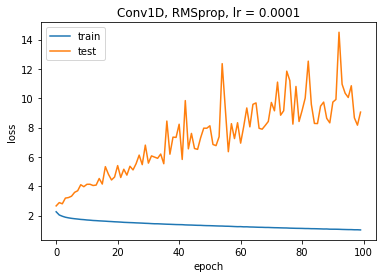

In [28]:
plt.plot(model_history_1.history['loss'])
plt.plot(model_history_1.history['val_loss'])
plt.title('Conv1D, RMSprop, lr = 0.0001')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [27]:
model_3 = Sequential()
model_3.add(Conv1D(256, 8, padding='same',input_shape=(X_train.shape[1],1)))  
model_3.add(Activation('relu'))
model_3.add(Conv1D(256, 8, padding='same'))
model_3.add(BatchNormalization())
model_3.add(Activation('relu'))
model_3.add(Dropout(0.25))
model_3.add(MaxPooling1D(pool_size=(8)))
model_3.add(Conv1D(128, 8, padding='same'))
model_3.add(Activation('relu'))
model_3.add(Conv1D(128, 8, padding='same'))
model_3.add(Activation('relu'))
model_3.add(Conv1D(128, 8, padding='same'))
model_3.add(Activation('relu'))
model_3.add(Conv1D(128, 8, padding='same'))
model_3.add(BatchNormalization())
model_3.add(Activation('relu'))
model_3.add(Dropout(0.25)) 
model_3.add(MaxPooling1D(pool_size=(8)))
model_3.add(Conv1D(64, 8, padding='same'))
model_3.add(Activation('relu'))#
model_3.add(Conv1D(64, 8, padding='same'))
model_3.add(Activation('relu'))
model_3.add(Flatten())
model_3.add(Dense(14)) 
model_3.add(Activation('softmax'))
opt = keras.optimizers.RMSprop(lr=0.00001, decay=1e-6)
model_3.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 216, 256)          2304      
_________________________________________________________________
activation_5 (Activation)    (None, 216, 256)          0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 216, 256)          524544    
_________________________________________________________________
batch_normalization_3 (Batch (None, 216, 256)          1024      
_________________________________________________________________
activation_6 (Activation)    (None, 216, 256)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 216, 256)          0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 27, 256)         

In [28]:
model_3.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
model_history_3 = model_3.fit(X_train, Y_train, batch_size=16, epochs=100, validation_data=(X_test, Y_test))

Train on 11189 samples, validate on 973 samples
Epoch 1/100
 2944/11189 [======>.......................] - ETA: 7:05 - loss: 2.6167 - accuracy: 0.12 - ETA: 4:15 - loss: 2.6803 - accuracy: 0.06 - ETA: 3:20 - loss: 2.7128 - accuracy: 0.06 - ETA: 2:54 - loss: 2.6859 - accuracy: 0.06 - ETA: 2:41 - loss: 2.6790 - accuracy: 0.06 - ETA: 2:31 - loss: 2.6757 - accuracy: 0.06 - ETA: 2:23 - loss: 2.6618 - accuracy: 0.08 - ETA: 2:18 - loss: 2.6696 - accuracy: 0.08 - ETA: 2:14 - loss: 2.6599 - accuracy: 0.08 - ETA: 2:11 - loss: 2.6781 - accuracy: 0.07 - ETA: 2:08 - loss: 2.6723 - accuracy: 0.07 - ETA: 2:06 - loss: 2.6640 - accuracy: 0.07 - ETA: 2:04 - loss: 2.6504 - accuracy: 0.08 - ETA: 2:02 - loss: 2.6597 - accuracy: 0.07 - ETA: 2:00 - loss: 2.6642 - accuracy: 0.07 - ETA: 1:59 - loss: 2.6624 - accuracy: 0.07 - ETA: 1:58 - loss: 2.6643 - accuracy: 0.06 - ETA: 1:57 - loss: 2.6631 - accuracy: 0.06 - ETA: 1:56 - loss: 2.6610 - accuracy: 0.06 - ETA: 1:55 - loss: 2.6611 - accuracy: 0.07 - ETA: 1:54 - l

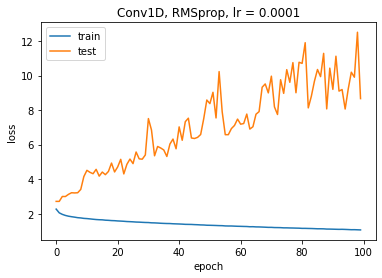

In [33]:
plt.plot(model_history_1.history['loss'])
plt.plot(model_history_1.history['val_loss'])
plt.title('Conv1D, RMSprop, lr = 0.0001')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("model_1")
plt.show()

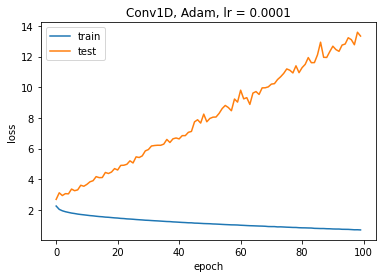

In [34]:
plt.plot(model_history_2.history['loss'])
plt.plot(model_history_2.history['val_loss'])
plt.title('Conv1D, Adam, lr = 0.0001')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("model_2")
plt.show()

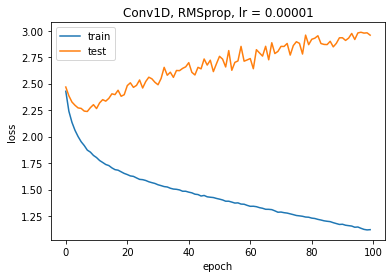

In [36]:
plt.plot(model_history_3.history['loss'])
plt.plot(model_history_3.history['val_loss'])
plt.title('Conv1D, RMSprop, lr = 0.00001')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("model_3")
plt.show()

In [ ]:
# Conv1D model, based on mean mfcc cannot establish patterns